# Notebook used for experimenting with the differnt types of distributions GMM's work well with and ones they dont work well with.
Pretty much works well for anything K-means works well on and then also distributions that are elliptic.

In [1]:
from GMM import GMM
from sklearn.cluster import KMeans

In [74]:
from sklearn.datasets import make_blobs, make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Circle
from scipy.stats import multivariate_normal

# Example 1: K-means doesn't work well for data with protrusions from mean

In [3]:
clust_one_cov = np.array([[20,0],
                          [0,1]])
clust_one = multivariate_normal(mean=[-10,0], cov=clust_one_cov).rvs(100)
clust_two_cov = np.array([[1,0],
                          [0,20]])
clust_two = multivariate_normal(mean=[3,0], cov=clust_two_cov).rvs(100)
exp_set = np.vstack([clust_one, clust_two])
labels = np.hstack((np.zeros(100),np.ones(100)))

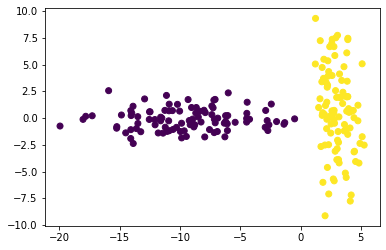

In [4]:
plt.scatter(*exp_set.T, c=labels)

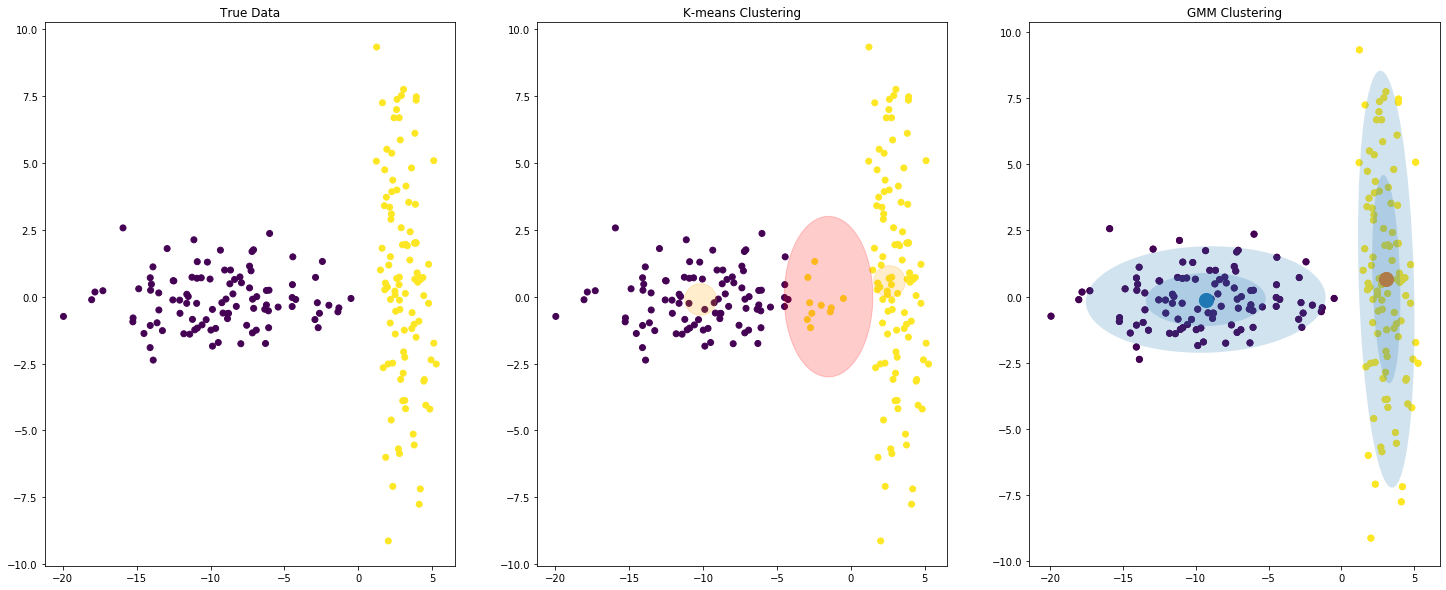

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,10))
num_centers = 2
ax[0].scatter(*exp_set.T, c=labels, cmap='viridis')
ax[0].set_title("True Data")

# Getting initial locations.
kmeans = KMeans(n_clusters=num_centers).fit(exp_set)
km_preds = kmeans.predict(exp_set)
mu_k = kmeans.cluster_centers_
ax[1].add_patch(Circle((-1.5,0), 3, fill=True, color='red', alpha=0.2))
ax[1].scatter(*exp_set.T, c=km_preds)
ax[1].scatter(*mu_k.T, s=1000, c='orange', alpha=.2)
ax[1].set_title("K-means Clustering")

ax[2].set_title("GMM Clustering")
gmm = GMM(num_centers, initial_mus=mu_k, initial_covs=[np.identity(2)*0.1]*num_centers, verbose=False)
gmm.fit(exp_set)
gmm.display_gmm(exp_set, ax[2])

plt.savefig("k-means_fault1")

# Example 3 K-means and Gmms perform similarly when working with centric data

In [41]:
centric_data, centric_labels = make_blobs(n_samples=300, cluster_std=1, centers=4)

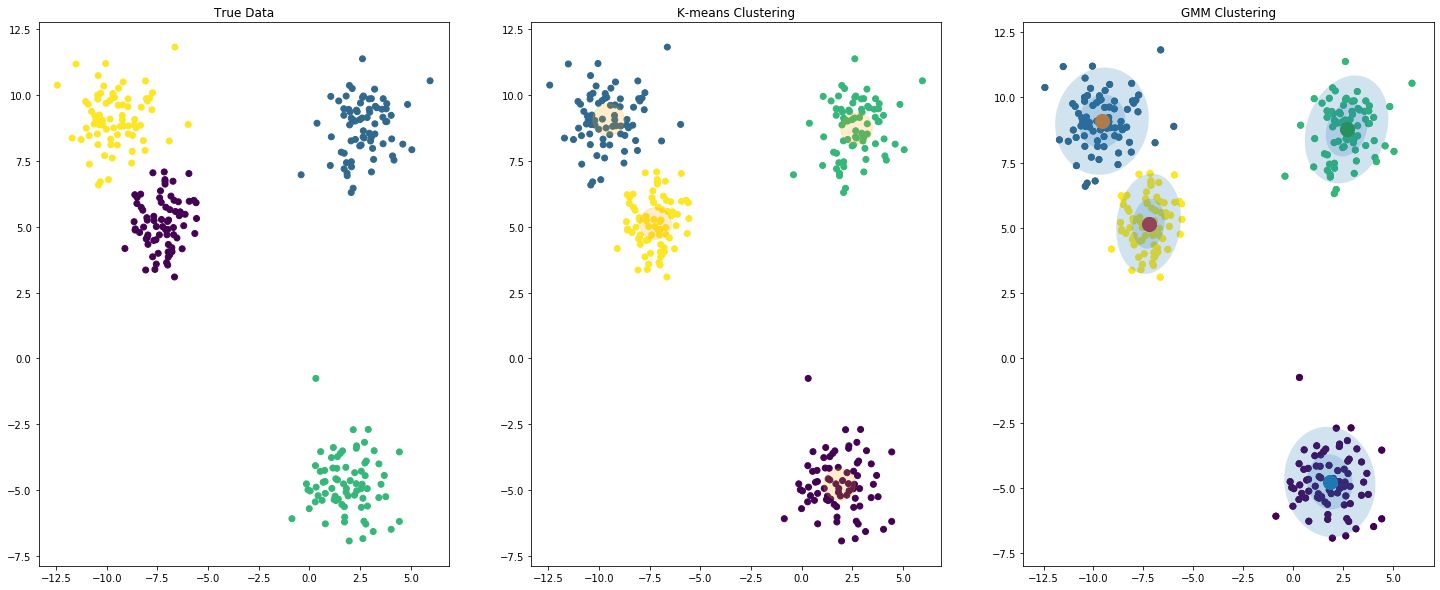

In [53]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(25,10))
ax[0].scatter(*centric_data.T, c=centric_labels, cmap='viridis')
ax[0].set_title("True Data")

# # Getting initial locations.
kmeans = KMeans(n_clusters=4).fit(centric_data)
km_preds = kmeans.predict(centric_data)
mu_k = kmeans.cluster_centers_
ax[1].scatter(*centric_data.T, c=km_preds)
ax[1].scatter(*mu_k.T, s=1000, c='orange', alpha=.2)
ax[1].set_title("K-means Clustering")

ax[2].set_title("GMM Clustering")
gmm = GMM(4, initial_mus=mu_k, initial_covs=[np.identity(2)*0.1]*4, verbose=False)
gmm.fit(centric_data)
gmm.display_gmm(centric_data, ax[2])

plt.savefig("k-means_same")

# Example 3: Bad Gaussian

In [103]:
moonX, moony = make_moons(n_samples=200, noise=.1)
circX, circy = make_circles(n_samples=200, factor=.5, noise=.1)

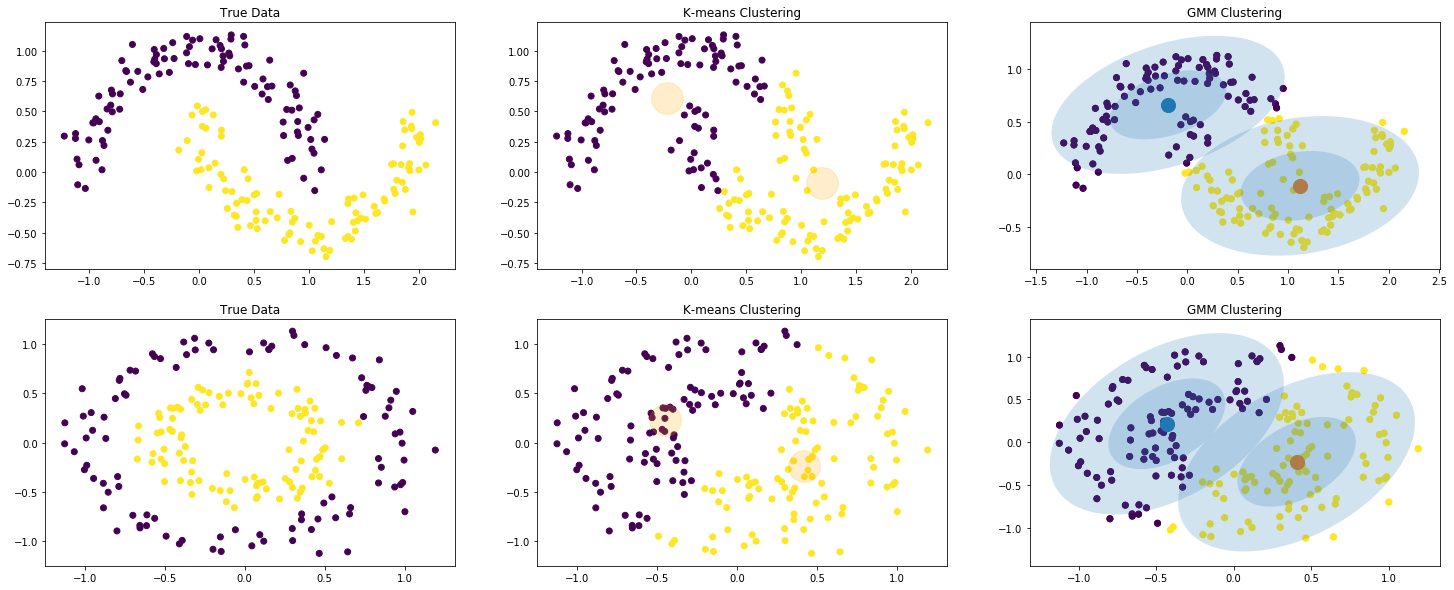

In [105]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(25,10))
num_centers = 2
for ax, data, labels in zip(axs, [moonX, circX], [moony, circy]):
    ax[0].scatter(*data.T, c=labels, cmap='viridis')
    ax[0].set_title("True Data")

    # Getting initial locations.
    kmeans = KMeans(n_clusters=num_centers).fit(data)
    km_preds = kmeans.predict(data)
    mu_k = kmeans.cluster_centers_
    ax[1].scatter(*data.T, c=km_preds)
    ax[1].scatter(*mu_k.T, s=1000, c='orange', alpha=.2)
    ax[1].set_title("K-means Clustering")

    # Gmm Clustering.
    ax[2].set_title("GMM Clustering")
    mus= np.array([[np.random.rand() for _ in range(3)] for _ in range(num_centers)])#kmm.cluster_centers_
    gmm = GMM(num_centers, initial_mus=mu_k, initial_covs=[np.identity(2)*0.1]*num_centers, verbose=False)
    gmm.fit(data)
    gmm.display_gmm(data, ax[2])

plt.savefig("k-means_fault3")